# Assgnment 1 - Supervised Learning
# Bank Marketing Data
## student: hyao66

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import csv
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import time

### load dataset and EDA
bank marketing dataset from UCI Machine Learning Repository

17 independent variables

dependent variable - has the client subscribed a term deposit, yes / no

URL for the dataset:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [ ]:
raw = pd.read_csv('/content/drive/MyDrive/CS7641A1/bank_marketing.csv', sep = ';')
raw.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
# summarize data
print(raw.describe())
a = raw.describe()
print('--------------------------------------------------------------------------------------------------------------')
print(raw['job'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['marital'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['education'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['default'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['housing'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['loan'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['contact'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['month'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['poutcome'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')
print(raw['y'].value_counts())
print('--------------------------------------------------------------------------------------------------------------')

                age        balance  ...         pdays      previous
count  45211.000000   45211.000000  ...  45211.000000  45211.000000
mean      40.936210    1362.272058  ...     40.197828      0.580323
std       10.618762    3044.765829  ...    100.128746      2.303441
min       18.000000   -8019.000000  ...     -1.000000      0.000000
25%       33.000000      72.000000  ...     -1.000000      0.000000
50%       39.000000     448.000000  ...     -1.000000      0.000000
75%       48.000000    1428.000000  ...     -1.000000      0.000000
max       95.000000  102127.000000  ...    871.000000    275.000000

[8 rows x 7 columns]
--------------------------------------------------------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown      

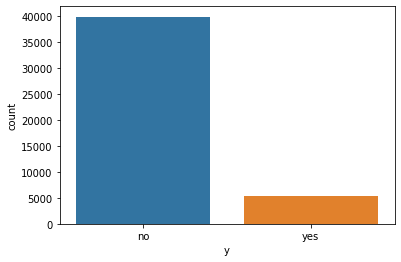

In [ ]:
# Plot y
sns.countplot(x="y", data=raw)

In [ ]:
a

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


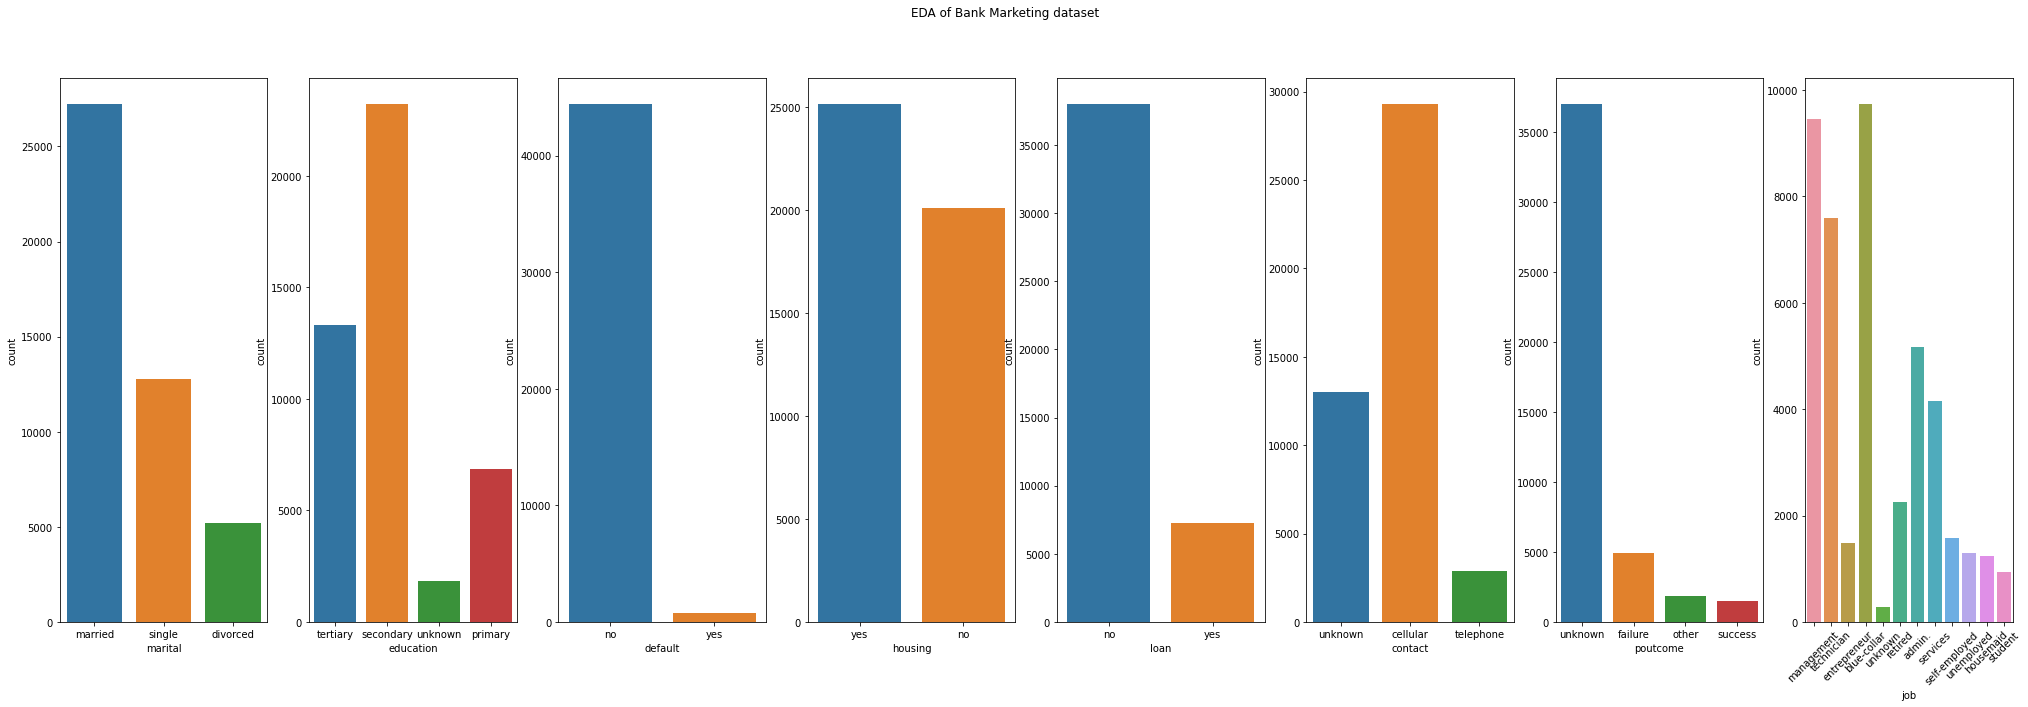

In [ ]:
## categorical
xs = ['marital', 'education', 'default', 'housing', 'loan' , 'contact','poutcome', 'job']
y = ["y"]


def plot_dist_plots(dataset, xx, figsize = (20, 15)):
    fig, axes = plt.subplots(1, len(xx), figsize=figsize)
    fig.suptitle('EDA of Bank Marketing dataset')

    for index in range(len(xx)):
        sns.countplot(ax = axes[index],x=xx[index], data=dataset)
        plt.xticks(rotation=45)

plot_dist_plots(raw, xs,figsize=(35,10))

In [ ]:
# label encoding for categorical data
raw['job'].astype('category')
raw['marital'].astype('category')
raw['education'].astype('category')
raw['default'].astype('category')
raw['housing'].astype('category')
raw['loan'].astype('category')
raw['contact'].astype('category')
raw['month'].astype('category')
raw['poutcome'].astype('category')
le = preprocessing.LabelEncoder()
raw['job_Cat'] = le.fit_transform(raw['job'])
raw['marital_Cat'] = le.fit_transform(raw['marital'])
raw['education_Cat'] = le.fit_transform(raw['education'])
raw['default_Cat'] = le.fit_transform(raw['default'])
raw['housing_Cat'] = le.fit_transform(raw['housing'])
raw['loan_Cat'] = le.fit_transform(raw['loan'])
raw['contact_Cat'] = le.fit_transform(raw['contact'])
raw['month_Cat'] = le.fit_transform(raw['month'])
raw['poutcome_Cat'] = le.fit_transform(raw['poutcome'])

In [ ]:
len(raw[raw.isnull().any(axis=1)])

0

In [ ]:
# train test split
# split data into training and testing sets
# Split the data into training and testing sets
raw_cat = raw.drop(["job","marital","education","default","housing","loan","contact","month","poutcome"], axis = 1)


features = raw_cat.drop(['y'], axis = 1)
feature_list = list(features.columns)
features_np = np.array(features)

labels = raw_cat[['y']]
labels_np = np.array(labels)[:,0]

label_unique = list(set(labels_np))

train_features, test_features, train_labels, test_labels = train_test_split(features_np, labels_np, test_size = 0.20, 
                                                                            random_state = 42)

print(feature_list)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_Cat', 'marital_Cat', 'education_Cat', 'default_Cat', 'housing_Cat', 'loan_Cat', 'contact_Cat', 'month_Cat', 'poutcome_Cat']
Training Features Shape: (36168, 16)
Training Labels Shape: (36168,)
Testing Features Shape: (9043, 16)
Testing Labels Shape: (9043,)


### Algorithm 1: Decision Trees with some form of pruning

In [ ]:
# ## tunning hyper parameter
# tuned_parameters = [{'criterion':["gini","entropy"],
#                      'splitter':["best","random"],
#                      'max_depth': range(2,25,1),
#                      'min_samples_leaf':range(1,10,1),
#                      'min_samples_split': range(2,10,2)}]


# print()
# print(f"Tuning hyperparameters for roc_auc")
# print()
    
# grid_search = GridSearchCV(
#                            estimator = DecisionTreeClassifier(), param_grid= tuned_parameters, cv=5,n_jobs=-1,
#                            scoring = 'roc_auc'
#                             )
# grid_search.fit(train_features, train_labels)
    
# print("Best parameters set found on development set:")
# print()
# print(grid_search.best_params_)
# print()
# print("Grid scores on development set:")
# means = grid_search.cv_results_["mean_test_score"]
# stds = grid_search.cv_results_["std_test_score"]
# for mean, std, params in zip(means, stds,
#                             grid_search.cv_results_['params']):
#     print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for roc_auc

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 6, 'splitter': 'best'}

Grid scores on development set:
0.716 (+/-0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.677 (+/-0.068) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
0.716 (+/-0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}
0.686 (+/-0.050) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
0.716 (+/-0.023) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'best'}
0.684 (+/-0.078) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 6, 'splitter': 'random'}
0.716 (+/-0.0

In [ ]:
# grid_search.cv_results_['mean_test_score']

In [ ]:
## decision tree
# Best parameters set found on development set:

# {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 6, 'splitter': 'best'}

t1 = time.time()
clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=8, min_samples_split=6, min_samples_leaf=9, random_state = 42)
clf.fit(train_features, train_labels)
t2 = time.time()
print(t2-t1)

0.2152576446533203


In [ ]:
clf.score(train_features, train_labels)

0.9112751603627516

0.7133955457586414
0.683316270215242


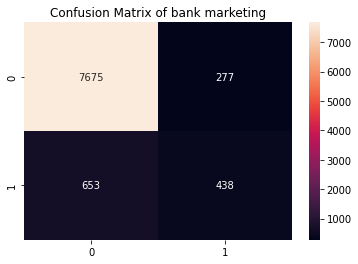

Test Accuracy
0.8971580227800509


In [ ]:
## calculate AUC for training data and testing data
y_pred = clf.predict(train_features)
y_pred = pd.Series(y_pred)
train_labels_series = pd.Series(train_labels)

y_pred = y_pred.map({'yes': 1, 'no': 0}).astype(int)
train_labels_series = train_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr,tpr,threshold = metrics.roc_curve(train_labels_series, y_pred, pos_label = 1)
print(metrics.auc(fpr,tpr))



## test performance
test_pred_dt = clf.predict(test_features)

test_pred_dt_series = pd.Series(test_pred_dt)
test_labels_series = pd.Series(test_labels)

test_pred_dt_series = test_pred_dt_series.map({'yes': 1, 'no': 0}).astype(int)
test_labels_series = test_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr2,tpr2,_ = metrics.roc_curve(test_labels_series, test_pred_dt_series, pos_label = 1)
print(metrics.auc(fpr2,tpr2))

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_dt)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)


ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of bank marketing")
plt.show()

print('Test Accuracy')
print(metrics.accuracy_score(test_labels, test_pred_dt))


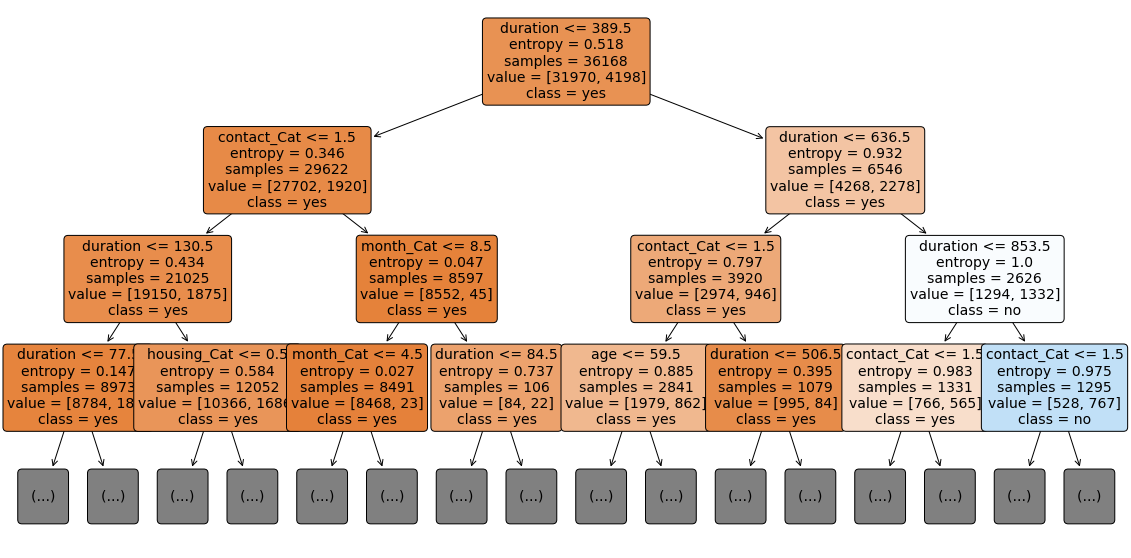

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(20,10))

# label_unique = list(set(labels_np))

#create the tree plot
a = tree.plot_tree(clf,
                   #use the feature names stored
                   feature_names = feature_list,
                   #use the class names stored
                   class_names = label_unique,
                   max_depth = 3,
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()

In [ ]:
#extract importance
importance = pd.DataFrame({'feature': feature_list, 
'importance' : np.round(clf.feature_importances_, 3)})
importance.sort_values('importance', ascending=False, inplace = True)
print(importance)

print('--------------------------------------------------------------------------------------------------------------')


          feature  importance
3        duration       0.486
14      month_Cat       0.123
13    contact_Cat       0.121
15   poutcome_Cat       0.069
5           pdays       0.068
11    housing_Cat       0.060
0             age       0.036
1         balance       0.011
2             day       0.009
4        campaign       0.009
8     marital_Cat       0.003
7         job_Cat       0.002
12       loan_Cat       0.002
9   education_Cat       0.001
6        previous       0.000
10    default_Cat       0.000
--------------------------------------------------------------------------------------------------------------


In [ ]:
## plot learning curve

length = [3617,7234,10851,14468,18085,21702,25319,28936,32553,36168]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    clf = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=2, min_samples_leaf=8, random_state = 42)
    clf.fit(train_features_alength, train_labels_alength)
    
    train_acc = clf.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_decision_tree = clf.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_decision_tree)
    test_er = 1- test_acc
    test_error.append(test_er)

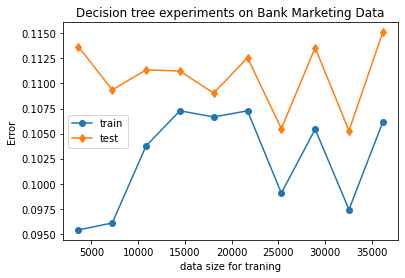

In [ ]:
plt.figure()

plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('Decision tree experiments on Bank Marketing Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

### Algorithm 2: Neural Networks

In [ ]:
## grid search for MLP classifier
## tunning hyper parameter
tuned_parameters = [{'solver': ['adam', 'sgd'],
                     'activation':['logistic', 'tanh', 'relu'],
                     'hidden_layer_sizes': [(100,100,100,100,100,100), (120, 100, 80, 60, 40, 20), (100, 80, 60, 40, 20), (100,100,50,50)],
                     'learning_rate_init': [0.0001, 0.001, 0.01, 0.1]
                    }]



print()
print(f"Tuning hyperparameters for accuracy")
print()
    
grid_search = GridSearchCV(
                           estimator = MLPClassifier(), param_grid= tuned_parameters, cv=5,n_jobs=-1,
                           scoring = 'accuracy'
                            )
grid_search.fit(train_features, train_labels)
    
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,
                            grid_search.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for accuracy

Best parameters set found on development set:

{'activation': 'relu', 'hidden_layer_sizes': (100, 80, 60, 40, 20), 'learning_rate_init': 0.001, 'solver': 'adam'}

Grid scores on development set:
0.893 (+/-0.008) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.0001, 'solver': 'adam'}
0.884 (+/-0.000) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.0001, 'solver': 'sgd'}
0.892 (+/-0.006) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.001, 'solver': 'adam'}
0.884 (+/-0.000) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.001, 'solver': 'sgd'}
0.884 (+/-0.002) for {'activation': 'logistic', 'hidden_layer_sizes': (100, 100, 100, 100, 100, 100), 'learning_rate_init': 0.01, 'solver': 'adam'}
0.884 (+/-0.000) for {'

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
# Tuning hyperparameters for accuracy

# Best parameters set found on development set:

# 0.895 (+/-0.007) {'activation': 'relu', 'hidden_layer_sizes': (100, 80, 60, 40, 20), 'learning_rate_init': 0.001, 'solver': 'adam'}
# 0.895 (+/-0.003) for {'activation': 'relu', 'hidden_layer_sizes': (100, 100, 50, 50), 'learning_rate_init': 0.001, 'solver': 'adam'}
t1=time.time()
MLPclf = MLPClassifier(activation='relu', hidden_layer_sizes= (100, 80, 60, 40, 20), learning_rate_init=0.001, solver='adam', max_iter = 1000)
MLPclf.fit(train_features, train_labels)
t2=time.time()
print(t2-t1)

372.9210789203644


In [ ]:
MLPclf.score(train_features, train_labels)

0.9121046228710462

0.6994831460473231
0.6616856270528763


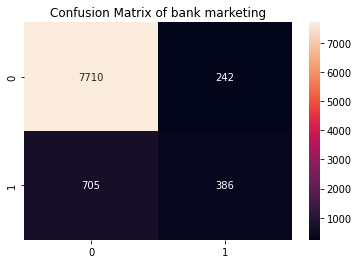

 TestAccuracy
0.8952781156695787


In [ ]:
## calculate AUC for training data and testing data
y_pred = MLPclf.predict(train_features)
y_pred = pd.Series(y_pred)
train_labels_series = pd.Series(train_labels)

y_pred = y_pred.map({'yes': 1, 'no': 0}).astype(int)
train_labels_series = train_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr,tpr,threshold = metrics.roc_curve(train_labels_series, y_pred, pos_label = 1)
print(metrics.auc(fpr,tpr))



## test performance
test_pred_mlp = MLPclf.predict(test_features)

test_pred_mlp_series = pd.Series(test_pred_mlp)
test_labels_series = pd.Series(test_labels)

test_pred_mlp_series = test_pred_mlp_series.map({'yes': 1, 'no': 0}).astype(int)
test_labels_series = test_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr2,tpr2,_ = metrics.roc_curve(test_labels_series, test_pred_mlp_series, pos_label = 1)
print(metrics.auc(fpr2,tpr2))

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_mlp)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)


ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of bank marketing")
plt.show()

print(' TestAccuracy')
print(metrics.accuracy_score(test_labels, test_pred_mlp))

In [ ]:
## plot learning curve

length = [3617,7234,10851,14468,18085,21702,25319,28936,32553,36168]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    MLPclf = MLPClassifier(activation='relu', hidden_layer_sizes= (100, 80, 60, 40, 20), learning_rate_init=0.001, solver='adam', max_iter = 1000)
    MLPclf.fit(train_features_alength, train_labels_alength)
    
    train_acc = MLPclf.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_mlp = MLPclf.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_mlp)
    test_er = 1- test_acc
    test_error.append(test_er)

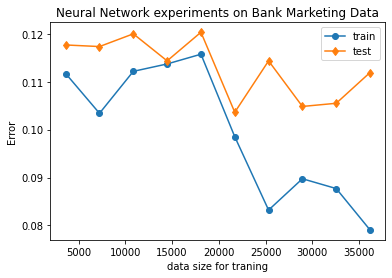

In [ ]:
plt.figure()

plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('Neural Network experiments on Bank Marketing Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

### Algorithm 3: Boosting

In [ ]:
## grid search for GBDT
## tunning hyper parameter
tuned_parameters = [{
                    #  'loss': ['deviance', 'exponential'],
                     'n_estimators':[10, 20, 50, 80, 100],
                    #  'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
                     'learning_rate': [0.001, 0.01, 0.1],
                     'max_depth': range(2,20,1)
                    #  'min_samples_leaf':range(1,10,1),
                    #  'min_samples_split': range(2,10,2)
                    }]



print()
print(f"Tuning hyperparameters for accuracy")
print()
    
grid_search = GridSearchCV(
                           estimator = GradientBoostingClassifier(), param_grid= tuned_parameters, cv=5,n_jobs=-1,
                           scoring = 'accuracy'
                            )
grid_search.fit(train_features, train_labels)
    
print("Best parameters set found on development set:")
print()
print(grid_search.best_params_)
print()
print("Grid scores on development set:")
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
for mean, std, params in zip(means, stds,
                            grid_search.cv_results_['params']):
    print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")


Tuning hyperparameters for accuracy

Best parameters set found on development set:

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 80}

Grid scores on development set:
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 10}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 20}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 80}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 20}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 50}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 80}
0.884 (+/-0.000) for {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100}
0

In [ ]:
# Tuning hyperparameters for accuracy

# Best parameters set found on development set:

# {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 80}

t1=time.time()
GBclf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth = 7, random_state = 42)
GBclf.fit(train_features, train_labels)
t2=time.time()
print(t2-t1)

17.8435320854187


In [ ]:
GBclf.score(train_features, train_labels)

0.947826808228268

0.8230507981294397
0.7154779617208291


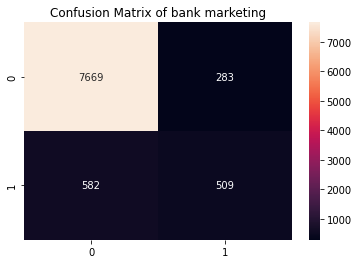

 TestAccuracy
0.9043459029083268


In [ ]:
## calculate AUC for training data and testing data
y_pred = GBclf.predict(train_features)
y_pred = pd.Series(y_pred)
train_labels_series = pd.Series(train_labels)

y_pred = y_pred.map({'yes': 1, 'no': 0}).astype(int)
train_labels_series = train_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr,tpr,threshold = metrics.roc_curve(train_labels_series, y_pred, pos_label = 1)
print(metrics.auc(fpr,tpr))



## test performance
test_pred_gb = GBclf.predict(test_features)

test_pred_gb_series = pd.Series(test_pred_gb)
test_labels_series = pd.Series(test_labels)

test_pred_gb_series = test_pred_gb_series.map({'yes': 1, 'no': 0}).astype(int)
test_labels_series = test_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr2,tpr2,_ = metrics.roc_curve(test_labels_series, test_pred_gb_series, pos_label = 1)
print(metrics.auc(fpr2,tpr2))

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_gb)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of bank marketing")
plt.show()


print(' TestAccuracy')
print(metrics.accuracy_score(test_labels, test_pred_gb))

In [ ]:
## plot learning curve

length = [3617,7234,10851,14468,18085,21702,25319,28936,32553,36168]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    GBclf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, max_depth = 7, random_state = 42)
    GBclf.fit(train_features_alength, train_labels_alength)
    
    train_acc = GBclf.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_boost = GBclf.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_boost)
    test_er = 1- test_acc
    test_error.append(test_er)

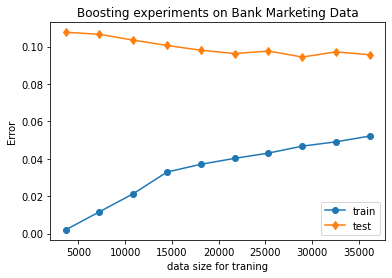

In [ ]:
plt.figure()

plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('Boosting experiments on Bank Marketing Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

### Algorithm 4: SVM

In [ ]:
## tunning for SVM

# tuned_parameters = [{
#                      'kernel':['poly','rbf']
#                      ,
#                      'C': [0.01,0.1,1,10]
#                      ,
#                     #  'gamma': ['scale', 'auto'],
#                      'class_weight': ['balanced']
#                     }]



# print()
# print(f"Tuning hyperparameters for accuracy")
# print()
    
# grid_search = GridSearchCV(
#                            estimator = svm.SVC(), param_grid= tuned_parameters, cv=5,n_jobs=-1,
#                            scoring = 'accuracy'
#                             )
# grid_search.fit(train_features, train_labels)
    
# print("Best parameters set found on development set:")
# print()
# print(grid_search.best_params_)
# print()
# print("Grid scores on development set:")
# means = grid_search.cv_results_["mean_test_score"]
# stds = grid_search.cv_results_["std_test_score"]
# for mean, std, params in zip(means, stds,
#                             grid_search.cv_results_['params']):
#     print(f"{mean:0.3f} (+/-{std*2:0.03f}) for {params}")

In [ ]:
# {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
t1=time.time()
svmclf = svm.SVC(C=0.1, kernel = 'rbf', class_weight = 'balanced')
svmclf.fit(train_features, train_labels)
t2=time.time()
print(t2-t1)

98.32655453681946


In [ ]:
svmclf.score(train_features, train_labels)

0.7997124529971246

0.734509752845651
0.7309660552683654


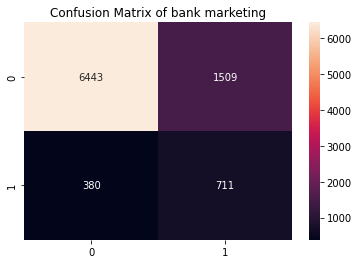

 TestAccuracy
0.7911091451951786


In [ ]:
## calculate AUC for training data and testing data
y_pred = svmclf.predict(train_features)
y_pred = pd.Series(y_pred)
train_labels_series = pd.Series(train_labels)

y_pred = y_pred.map({'yes': 1, 'no': 0}).astype(int)
train_labels_series = train_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr,tpr,threshold = metrics.roc_curve(train_labels_series, y_pred, pos_label = 1)
print(metrics.auc(fpr,tpr))



## test performance
test_pred_svm = svmclf.predict(test_features)

test_pred_svm_series = pd.Series(test_pred_svm)
test_labels_series = pd.Series(test_labels)

test_pred_svm_series = test_pred_svm_series.map({'yes': 1, 'no': 0}).astype(int)
test_labels_series = test_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr2,tpr2,_ = metrics.roc_curve(test_labels_series, test_pred_svm_series, pos_label = 1)
print(metrics.auc(fpr2,tpr2))

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_svm)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of bank marketing")
plt.show()

print(' TestAccuracy')
print(metrics.accuracy_score(test_labels, test_pred_svm))

In [ ]:
## plot learning curve

length = [3617,7234,10851,14468,18085,21702,25319,28936,32553,36168]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    svmclf = svm.SVC(C=0.1, kernel = 'rbf', class_weight = 'balanced')
    svmclf.fit(train_features_alength, train_labels_alength)
    
    train_acc = svmclf.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_svm = svmclf.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_svm)
    test_er = 1- test_acc
    test_error.append(test_er)

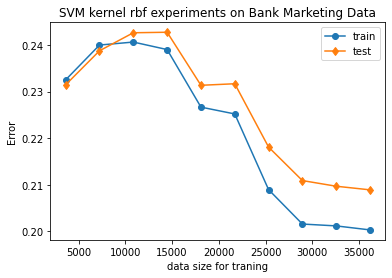

In [ ]:
plt.figure()

plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('SVM kernel rbf experiments on Bank Marketing Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

In [ ]:
svmclf2 = svm.SVC(C=0.1, kernel = 'poly', class_weight = 'balanced')
svmclf2.fit(train_features, train_labels)

SVC(C=0.1, class_weight='balanced', kernel='poly')

In [ ]:
## calculate AUC for training data and testing data
print(svmclf2.score(train_features, train_labels))

y_pred = svmclf2.predict(train_features)
y_pred = pd.Series(y_pred)
train_labels_series = pd.Series(train_labels)

y_pred = y_pred.map({'yes': 1, 'no': 0}).astype(int)
train_labels_series = train_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr,tpr,threshold = metrics.roc_curve(train_labels_series, y_pred, pos_label = 1)
print(metrics.auc(fpr,tpr))



## test performance
test_pred_svm = svmclf2.predict(test_features)

test_pred_svm_series = pd.Series(test_pred_svm)
test_labels_series = pd.Series(test_labels)

test_pred_svm_series = test_pred_svm_series.map({'yes': 1, 'no': 0}).astype(int)
test_labels_series = test_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr2,tpr2,_ = metrics.roc_curve(test_labels_series, test_pred_svm_series, pos_label = 1)
print(metrics.auc(fpr2,tpr2))

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_svm)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of bank marketing")
plt.show())


print(' TestAccuracy')
print(metrics.accuracy_score(test_labels, test_pred_svm))

0.8791196637911967
0.5627718369248922
0.5675367512130529
Confusion Matrix
      0    1
0  7736  216
1   914  177
 TestAccuracy
0.8750414685392016


In [ ]:
## plot learning curve

length = [3617,7234,10851,14468,18085,21702,25319,28936,32553,36168]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    svmclf2 = svm.SVC(C=0.1, kernel = 'poly', class_weight = 'balanced')
    svmclf2.fit(train_features_alength, train_labels_alength)
    
    train_acc = svmclf2.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_svm = svmclf2.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_svm)
    test_er = 1- test_acc
    test_error.append(test_er)

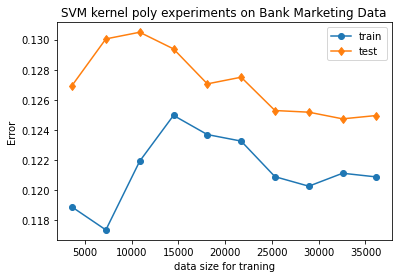

In [ ]:
plt.figure()

plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('SVM kernel poly experiments on Bank Marketing Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])

### Algorithm 5: KNN

In [ ]:
## tunning for K

k_range = range(1,50,2)
auc_train = []
auc_test = []
score_train = []
score_test = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k, algorithm='auto', metric='minkowski', p = 2, metric_params=None, weights='uniform')

  knn.fit(train_features, train_labels)

  y_pred = knn.predict(train_features)
  y_pred_series = pd.Series(y_pred)
  train_labels_series = pd.Series(train_labels)

  y_pred_series = y_pred_series.map({'yes': 1, 'no': 0}).astype(int)
  train_labels_series = train_labels_series.map({'yes': 1, 'no': 0}).astype(int)

  fpr,tpr,_ = metrics.roc_curve(train_labels_series, y_pred_series, pos_label = 1)
  auc1 = metrics.auc(fpr,tpr)

  auc_train.append(auc1)

  train_acc = metrics.accuracy_score(train_labels, y_pred)
  score_train.append(train_acc)


  ## test performance
  test_pred_knn = knn.predict(test_features)

  test_pred_knn_series = pd.Series(test_pred_knn)
  test_labels_series = pd.Series(test_labels)

  test_pred_knn_series = test_pred_knn_series.map({'yes': 1, 'no': 0}).astype(int)
  test_labels_series = test_labels_series.map({'yes': 1, 'no': 0}).astype(int)

  fpr2,tpr2,_ = metrics.roc_curve(test_labels_series, test_pred_knn_series, pos_label = 1)
  auc2 = metrics.auc(fpr2,tpr2)
  auc_test.append(auc2)

  test_acc = metrics.accuracy_score(test_labels, test_pred_knn)
  score_test.append(test_acc)


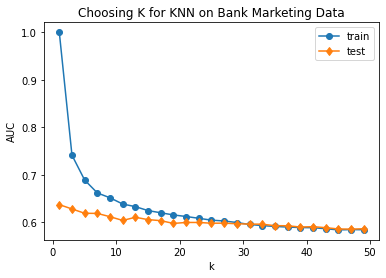

In [ ]:

plt.figure()

plt.plot(k_range, auc_train, marker='o')
plt.ylabel('AUC')
plt.title('Choosing K for KNN on Bank Marketing Data')
plt.plot(k_range, auc_test, marker='d')
plt.xlabel('k')
plt.legend(['train', 'test'])

## k = 34

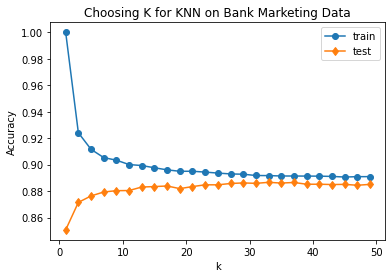

In [ ]:
plt.figure()

plt.plot(k_range, score_train, marker='o')
plt.ylabel('Accuracy')
plt.title('Choosing K for KNN on Bank Marketing Data')
plt.plot(k_range, score_test, marker='d')
plt.xlabel('k')
plt.legend(['train', 'test'])

In [ ]:

t1=time.time()
knn = KNeighborsClassifier(n_neighbors=30, algorithm='auto', metric='minkowski', p = 2, metric_params=None, weights='uniform')
knn.fit(train_features, train_labels)
t2=time.time()
print(t2-t1)

0.05005455017089844


In [ ]:
knn.score(train_features, train_labels)

0.8920592789205928

0.5880940519660002
0.587664103318352


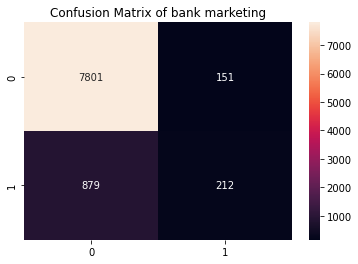

In [ ]:
## calculate AUC for training data and testing data
y_pred = knn.predict(train_features)
y_pred = pd.Series(y_pred)
train_labels_series = pd.Series(train_labels)

y_pred = y_pred.map({'yes': 1, 'no': 0}).astype(int)
train_labels_series = train_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr,tpr,threshold = metrics.roc_curve(train_labels_series, y_pred, pos_label = 1)
print(metrics.auc(fpr,tpr))



## test performance
test_pred_knn = knn.predict(test_features)

test_pred_knn_series = pd.Series(test_pred_knn)
test_labels_series = pd.Series(test_labels)

test_pred_knn_series = test_pred_knn_series.map({'yes': 1, 'no': 0}).astype(int)
test_labels_series = test_labels_series.map({'yes': 1, 'no': 0}).astype(int)

fpr2,tpr2,_ = metrics.roc_curve(test_labels_series, test_pred_knn_series, pos_label = 1)
print(metrics.auc(fpr2,tpr2))

#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_knn)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

ax = plt.axes()
sns.heatmap(matrix_confusion,annot=True, annot_kws={"size": 10},fmt="d", ax=ax)
ax.set_title("Confusion Matrix of bank marketing")
plt.show()

In [ ]:
# test performance
test_pred_knn = knn.predict(test_features)


#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels,  
                                            test_pred_knn
)
#turn this into a dataframe
matrix_confusion = pd.DataFrame(confusion_matrix)

print("Confusion Matrix")
print(matrix_confusion)


print('--------------------------------------------------------------------------------------------------------------')


## Performance Measurements

print('Accuracy')
print(metrics.accuracy_score(test_labels, test_pred_knn))

print('--------------------------------------------------------------------------------------------------------------')

print('Precision')

precision = metrics.precision_score(test_labels,
                                    test_pred_knn, 
                                    average=None)
precision_results = pd.DataFrame(precision, index=label_unique)
precision_results.rename(columns={0:'precision'}, inplace =True)
print(precision_results)

print('--------------------------------------------------------------------------------------------------------------')

print('Recall')
recall = metrics.recall_score(test_labels, test_pred_knn, 
                              average =None)
recall_results = pd.DataFrame(recall, index= label_unique)
recall_results.rename(columns ={0:'Recall'}, inplace =True)
print(recall_results)

print('--------------------------------------------------------------------------------------------------------------')

print('f1')

f1 = metrics.f1_score(test_labels, test_pred_knn, average=None)
f1_results = pd.DataFrame(f1, index=label_unique)

f1_results.rename(columns={0:'f1'}, inplace=True)
print(f1_results)

print('--------------------------------------------------------------------------------------------------------------')


print(metrics.classification_report(test_labels,
                                    test_pred_knn))

print('--------------------------------------------------------------------------------------------------------------')

Confusion Matrix
      0    1
0  7801  151
1   879  212
--------------------------------------------------------------------------------------------------------------
Accuracy
0.8860997456596262
--------------------------------------------------------------------------------------------------------------
Precision
     precision
yes   0.898733
no    0.584022
--------------------------------------------------------------------------------------------------------------
Recall
       Recall
yes  0.981011
no   0.194317
--------------------------------------------------------------------------------------------------------------
f1
           f1
yes  0.938071
no   0.291609
--------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.58      0.19      0.29      1091

    accuracy                           0.89     

In [ ]:
## plot learning curve

length = [3617,7234,10851,14468,18085,21702,25319,28936,32553,36168]
test_error = []
train_error = []

for a_length in length:
    
    train_features_alength = train_features[0:a_length,:]
    train_labels_alength = train_labels[0:a_length]
    knn = KNeighborsClassifier(n_neighbors=30, algorithm='auto', metric='minkowski', p = 2, metric_params=None, weights='uniform')
    knn.fit(train_features_alength, train_labels_alength)
    
    train_acc = knn.score(train_features_alength, train_labels_alength)
    train_er = 1 - train_acc
    train_error.append(train_er)
    
    test_pred_knn = knn.predict(test_features)
    test_acc = metrics.accuracy_score(test_labels, test_pred_knn)
    test_er = 1- test_acc
    test_error.append(test_er)

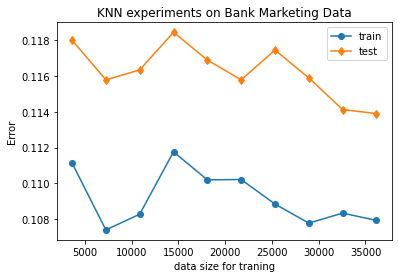

In [ ]:
plt.figure()

plt.plot(length, train_error, marker='o')
plt.ylabel('Error')
plt.title('KNN experiments on Bank Marketing Data')
plt.plot(length, test_error, marker='d')
plt.xlabel('data size for traning')
plt.legend(['train', 'test'])